<a href="https://colab.research.google.com/github/nklbigone/DIC-ML/blob/main/Sprint5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lagrange's steepest descent by the undetermined multiplier method

In [2]:
import numpy as np
import matplotlib.pyplot as plt
class ScratchSVMClassifier():
    """
    Scratch implementation of SVM classifier
    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    kernel : str
      Kernel type. Linear kernel (linear) or polynomial kernel (polly)
    threshold : float
      Threshold for choosing a support vector
    verbose : bool
      True to output the learning process
    Attributes
    ----------
    self.n_support_vectors : int
      Number of support vectors
    self.index_support_vectors : The following form of ndarray, shape (n_support_vectors,)
      Support vector index
    self.X_sv :  The following forms of ndarray, shape (n_support_vectors, n_features)
      Support vector features
    self.lam_sv :  The following forms of ndarray, shape (n_support_vectors, 1)
      Support vector undetermined multiplier
    self.y_sv :  The following forms of ndarray, shape (n_support_vectors, 1)
      Support vector label
    """
    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False, d=1, gamma=1, theta=0):
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.degree = d
        self.gamma = gamma
        self.theta = theta

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn the SVM classifier. If verification data is input, the accuracy for it is also calculated for each iteration.
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : 次の形のndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """
        self.label = np.unique(y)
        y = np.where(y == self.label[0], -1, 1)
        
        self.lamda = np.random.rand(len(X))
        
        for i in range(self.iter):
            self._update_lambda(X,y)
            if self.verbose:
                print("iteration: {}, lamda: {}".format(i,self.lamda))
        self.index_support_vector = np.where(self.lamda > self.threshold)[0]
        self.X_sv = X[self.index_support_vector,:]
        self.y_sv = y[self.index_support_vector].reshape(-1,1)
        self.lam_sv = self.lamda[self.index_support_vector].reshape(-1,1)
        self.n_support_vectors = len(self.lam_sv)
    def predict(self, X):
        """
        Estimate the label using the SVM classifier.
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by SVM classifier
        """
        n = X.shape[0]
        y_pred = np.zeros(n)
        
        for i in range(n):
            temp = 0
            for j in range(self.n_support_vectors):
                temp += self.lam_sv[j]*self.y_sv[j]*self._kernel(X[i],self.X_sv[j])
            if temp >= 0:
                y_pred[i] = self.label[1]
            else:
                y_pred[i] = self.label[0]
                
        return y_pred
    
    def _update_lambda(self, X, y):
        """
        Update parameter lambda during training process
        Parameters
        -----------
        X: input data, ndarray (n_samples, n_features)
        y: label data, ndarray (n_samples,)
        """
        n = X.shape[0]
        
        for i in range(n):
            update_sum = 0
            for j in range(n):
                update_sum += self.lamda[j]*y[i]*y[j]*self._kernel(X[i],X[j]) 
            self.lamda[i] += self.lr*(1-update_sum)
            if self.lamda[i] < 0:
                self.lamda[i] = 0
                
    def _kernel(self, X_i, X_j):
        """
        Compute the result when applying kernel function to two samples
        Parameters
        ------------
        X_i, X_j: (n_features,) ndarray
        """
        if self.kernel =='polly':
          self.gamma = 1
          self.theta = 1
        return (self.gamma*np.dot(X_i,X_j.T) + self.theta)**self.degree

## [Problem 4] Learning and estimation

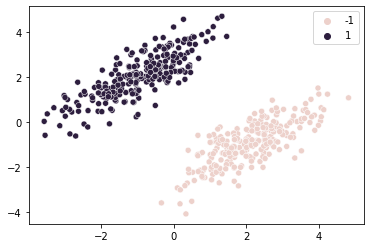

In [3]:
import numpy as np
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, n_samples // 2)
f1 = np.random.multivariate_normal(f1, cov, n_samples // 2)
X = np.concatenate([f0, f1])
y = np.concatenate([
    np.full(n_samples // 2, 1),
    np.full(n_samples // 2, -1)
])
import seaborn as sns
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

Estimate with SVM

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,train_size =0.75)
model = ScratchSVMClassifier(num_iter=100,lr=0.01,verbose=False)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(y_pred)

[-1.  1. -1.  1.  1. -1. -1.  1.  1. -1.  1.  1. -1.  1. -1. -1. -1.  1.
 -1. -1. -1. -1. -1. -1.  1. -1. -1.  1.  1. -1. -1. -1. -1.  1.  1. -1.
 -1.  1.  1.  1. -1.  1. -1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1. -1.
  1.  1.  1.  1.  1.  1. -1. -1. -1. -1.  1.  1. -1.  1.  1. -1. -1. -1.
 -1. -1. -1. -1. -1.  1. -1. -1.  1.  1. -1.  1. -1.  1.  1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1.  1.  1. -1.  1.  1. -1.  1. -1. -1.  1. -1.  1.
 -1.  1.  1. -1. -1.  1. -1. -1.  1.  1.  1.  1.  1.  1. -1.  1.  1.]


In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate(y_pred, y_test):
  print("accuracy: {}".format(accuracy_score(y_test,y_pred)))
  print("precision: {}".format(precision_score(y_test,y_pred)))
  print("recall: {}".format(recall_score(y_test,y_pred)))
  print("f1: {}".format(f1_score(y_test,y_pred)))
evaluate(y_pred,y_test)

accuracy: 1.0
precision: 1.0
recall: 1.0
f1: 1.0


In [6]:
from sklearn.svm import SVC
model_sk = SVC()
model_sk.fit(X_train,y_train)
y_pred_sk = model_sk.predict(X_test)
evaluate(y_pred_sk,y_test)

accuracy: 1.0
precision: 1.0
recall: 1.0
f1: 1.0


As you can see the result Both models did perfectly at the same level to this dataset.

## [Problem 5] Visualization of decision area

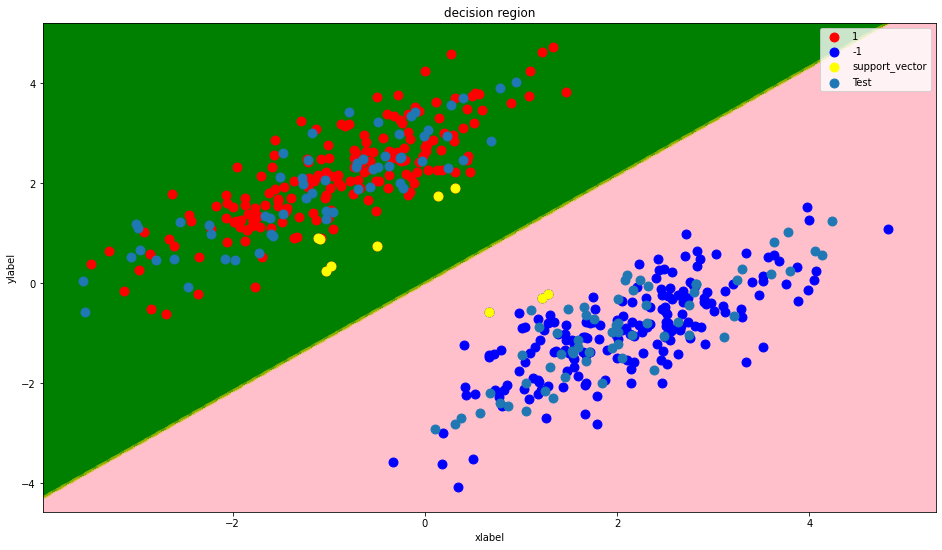

In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['1', '-1']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'green']
    n_class = 2
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.scatter(model.X_sv[:,0], model.X_sv[:,1], color='yellow', s=80, label='support_vector')
    plt.legend(handles=patches)
    plt.legend()
fig, ax = plt.subplots(figsize=(16,9))
decision_region(X_train,y_train,model)
plt.scatter(X_test[:,0], X_test[:,1], s=80, label="Test")
plt.legend();

## [Problem 6] (Advance task) Creation of polynomial kernel function

In [8]:
model = ScratchSVMClassifier(num_iter=100,lr=0.01,verbose=False,kernel="polly",d=2)
model.fit(X_train,y_train)
y_pred_polly = model.predict(X_test)
evaluate(y_pred=y_pred_polly,y_test=y_test)

accuracy: 1.0
precision: 1.0
recall: 1.0
f1: 1.0


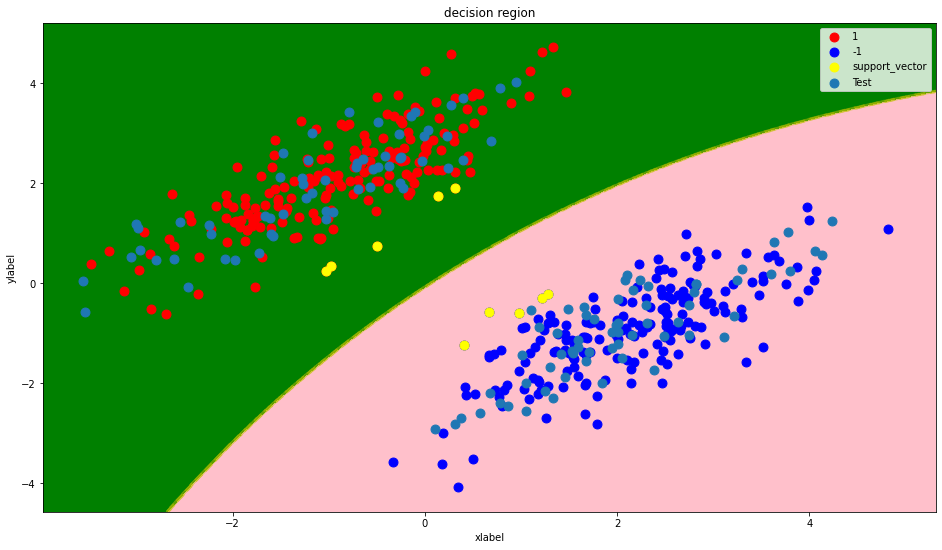

In [9]:
fig, ax = plt.subplots(figsize=(16,9))
decision_region(X_train,y_train,model)
plt.scatter(X_test[:,0], X_test[:,1], s=80, label="Test")
plt.legend();